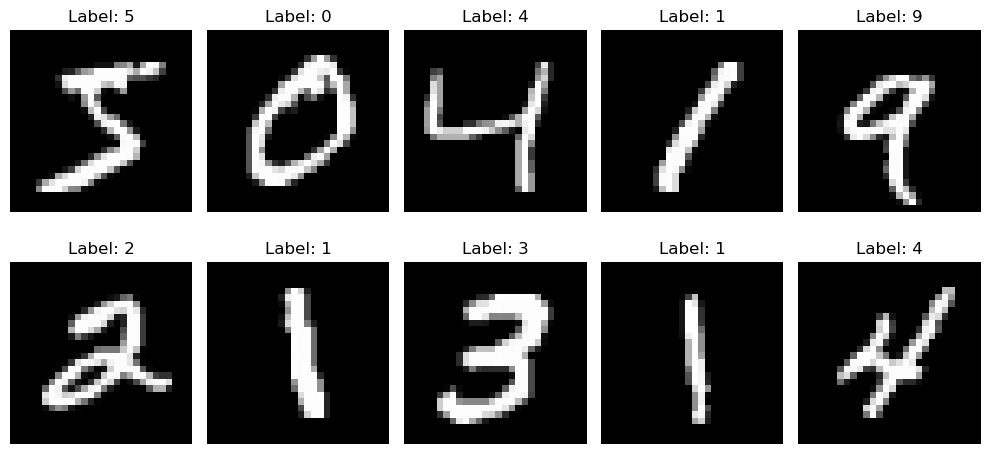

In [1]:
# 1- Load and preprocess (data normalization) the MNIST dataset
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time

# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# visualize the data 10 first images 
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()


# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten images (from 28x28 to 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)



In [2]:
print("Training data shape:", X_train.shape)  
print("Test data shape:", X_test.shape)      
print("Unique labels:", set(y_train))     


Training data shape: (60000, 784)
Test data shape: (10000, 784)
Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [3]:
# 2- Split the train set into Train and validations sets (20% for validation).
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [4]:
# 3 - Design an MLP architecture using Keras
# One input layer (784 neurons, flattened input).
# Two hidden layers (128 and 64 neurons) with ReLU activation.
# One output layer (10 neurons for classification, softmax activation).
# Cross-entropy loss function.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\TRETEC\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
training_times = {}
histories = {}

In [6]:
# 4- Train the model with different SGD strategies
# SGD
# Mini-batch SGD (batch size = 64)
# Batch SGD (full batch)
# Train for 50 epochs with a learning rate of 0.01.

from tensorflow.keras.optimizers import SGD

# Standard SGD
sgd_optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_sgd = model.fit(X_train, y_train, epochs=5, batch_size=1, validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["SGD"] = end_time - start_time
histories["SGD"] = history_sgd



Epoch 1/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 134s 3ms/step - accuracy: 0.8770 - loss: 0.3938 - val_accuracy: 0.9572 - val_loss: 0.1401
Epoch 2/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 201s 4ms/step - accuracy: 0.9644 - loss: 0.1144 - val_accuracy: 0.9491 - val_loss: 0.1557
Epoch 3/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 121s 2ms/step - accuracy: 0.9741 - loss: 0.0834 - val_accuracy: 0.9619 - val_loss: 0.1246
Epoch 4/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 177s 4ms/step - accuracy: 0.9825 - loss: 0.0563 - val_accuracy: 0.9695 - val_loss: 0.1071
Epoch 5/5
48000/48000 ━━━━━━━━━━━━━━━━━━━━ 1439s 30ms/step - accuracy: 0.9842 - loss: 0.0472 - val_accuracy: 0.9665 - val_loss: 0.1265


In [7]:
# Mini-batch SGD
sgd_mini_batch = SGD(learning_rate=0.01)
model.compile(optimizer=sgd_mini_batch, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_mini = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["Mini-batch SGD"] = end_time - start_time
histories["Mini-batch SGD"] = history_mini


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9865 - loss: 0.0387 - val_accuracy: 0.9769 - val_loss: 0.0870
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9929 - loss: 0.0232 - val_accuracy: 0.9787 - val_loss: 0.0825
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9934 - loss: 0.0205 - val_accuracy: 0.9791 - val_loss: 0.0802
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9944 - loss: 0.0188 - val_accuracy: 0.9794 - val_loss: 0.0790
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9954 - loss: 0.0174 - val_accuracy: 0.9797 - val_loss: 0.0781


In [8]:
# Batch SGD (Full batch)
sgd_batch = SGD(learning_rate=0.01)
model.compile(optimizer=sgd_batch, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_batch = model.fit(X_train, y_train, epochs=5, batch_size=len(X_train), validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["Batch SGD"] = end_time - start_time
histories["Batch SGD"] = history_batch


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9955 - loss: 0.0161 - val_accuracy: 0.9797 - val_loss: 0.0781
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - accuracy: 0.9955 - loss: 0.0161 - val_accuracy: 0.9797 - val_loss: 0.0781
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.9955 - loss: 0.0161 - val_accuracy: 0.9797 - val_loss: 0.0781
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step - accuracy: 0.9955 - loss: 0.0161 - val_accuracy: 0.9797 - val_loss: 0.0781
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step - accuracy: 0.9955 - loss: 0.0161 - val_accuracy: 0.9797 - val_loss: 0.0780


In [9]:
# 5- Compare training time and learning curves for different SGD variants
sgd_decay = SGD(learning_rate=0.01, decay=1e-6)
sgd_momentum = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9)

model.compile(optimizer=sgd_decay, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train models with decay and momentum
start_time = time.time()
history_sgd_decay = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["SGD decay"] = end_time - start_time
histories["SGD decay"] = history_sgd_decay

model.compile(optimizer=sgd_momentum, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ---------
start_time = time.time()
history_sgd_momentum = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["SGD momentum"] = end_time - start_time
histories["SGD momentum"] = history_sgd_momentum

c:\Users\TRETEC\miniconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9953 - loss: 0.0167 - val_accuracy: 0.9800 - val_loss: 0.0775
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9963 - loss: 0.0143 - val_accuracy: 0.9802 - val_loss: 0.0772
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9965 - loss: 0.0150 - val_accuracy: 0.9806 - val_loss: 0.0767
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9965 - loss: 0.0135 - val_accuracy: 0.9808 - val_loss: 0.0766
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9963 - loss: 0.0135 - val_accuracy: 0.9808 - val_loss: 0.0764
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9966 - loss: 0.0129 - val_accuracy: 0.9808 - val_loss: 0.0762
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9967 - loss: 0.0127 - val_accuracy: 0.9810 - val_loss: 0.0760
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9964 - loss: 0.0136 - val_accuracy: 0.

In [10]:
# 6. Compare different optimizers (SGD, Adam, RMSProp)
from tensorflow.keras.optimizers import Adam, RMSprop

# Adam optimizer
adam_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_adam = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["Adam"] = end_time - start_time
histories["Adam"] = history_adam


# RMSProp optimizer
rmsprop_optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
history_rmsprop = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))
end_time = time.time()

# Store results
training_times["RMSProp"] = end_time - start_time
histories["RMSProp"] = history_rmsprop


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9778 - val_loss: 0.1209
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9977 - loss: 0.0068 - val_accuracy: 0.9774 - val_loss: 0.1247
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9966 - loss: 0.0106 - val_accuracy: 0.9777 - val_loss: 0.1295
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9778 - val_loss: 0.1224
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9976 - loss: 0.0063 - val_accuracy: 0.9779 - val_loss: 0.1211
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9985 - loss: 0.0043 - val_accuracy: 0.9769 - val_loss: 0.1324
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9981 - loss: 0.0058 - val_accuracy: 0.9764 - val_loss: 0.1340
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9981 - loss: 0.0074 - val_accuracy: 0.

In [11]:
# 7. Export the best model and make predictions
model.save("best_mnist_model.h5")

# Load the model
best_model = keras.models.load_model("best_mnist_model.h5")

# Make predictions on test samples
predictions = best_model.predict(X_test[:5])
print(np.argmax(predictions, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[7 2 1 0 4]


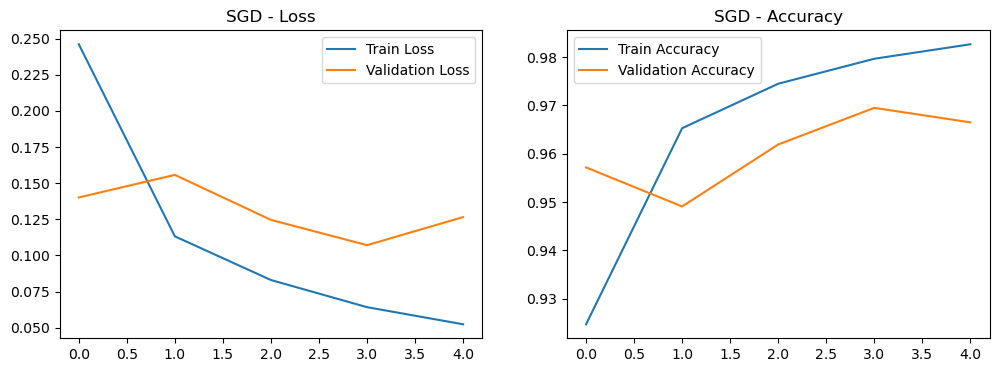

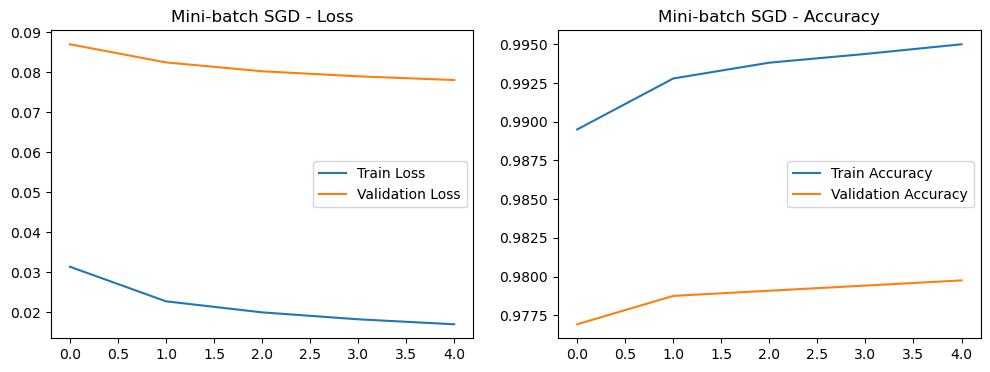

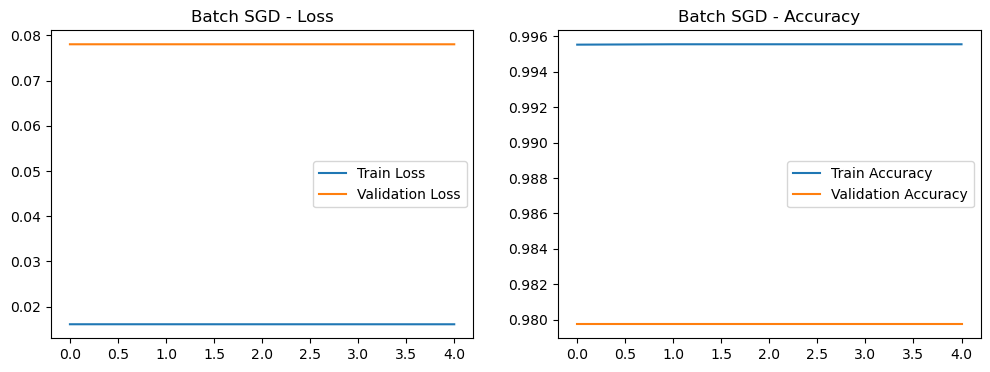

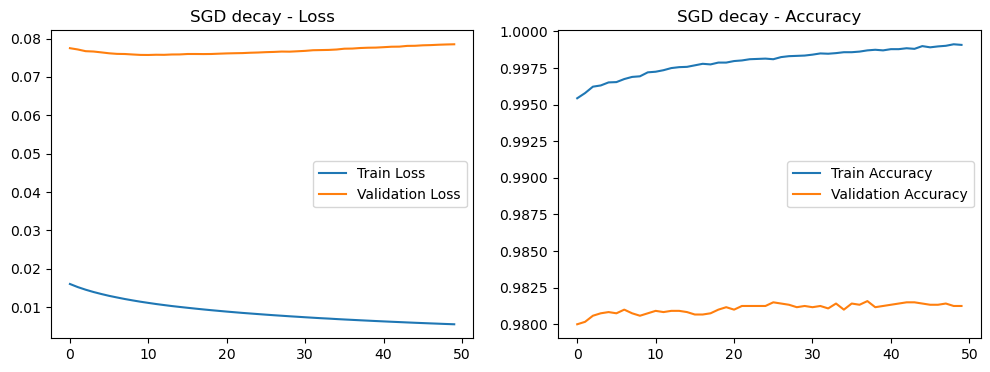

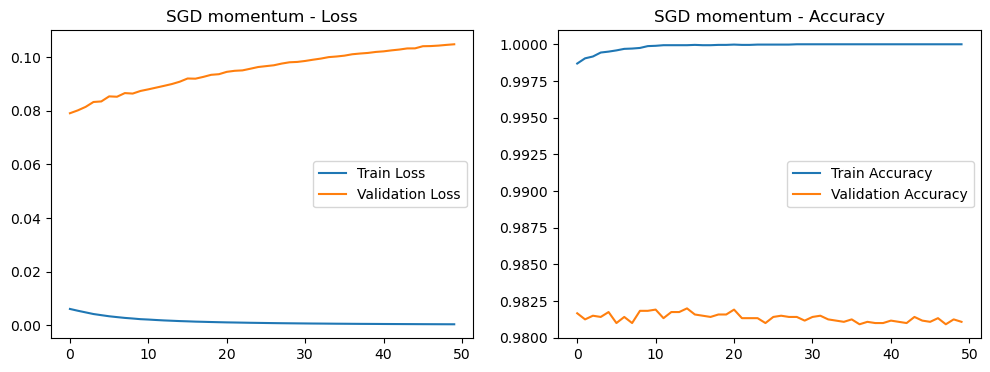

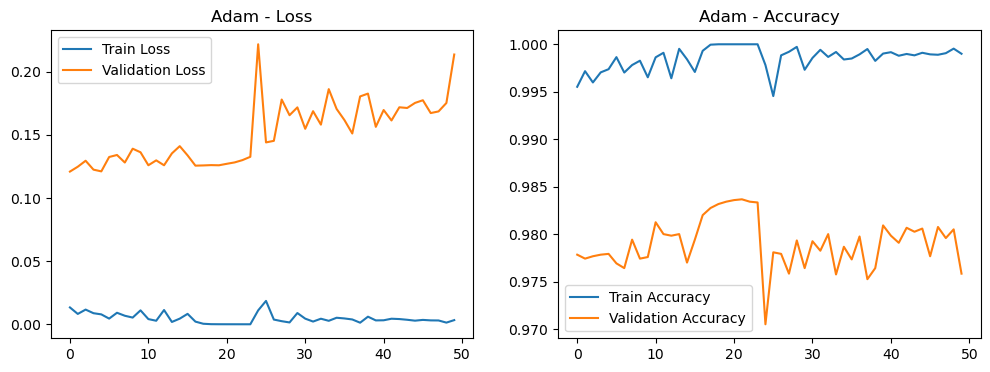

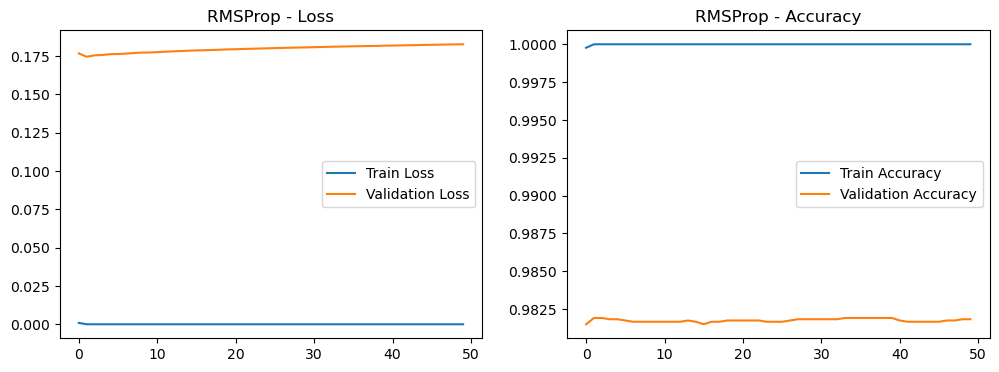

In [12]:
# 8. Present results (graphs, accuracy, running time)
import matplotlib.pyplot as plt

def plot_learning_curve(history, title):
    plt.figure(figsize=(12, 4))
    
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title + " - Loss")
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title + " - Accuracy")
    plt.legend()
    
    plt.show()



plot_learning_curve(history_sgd, "SGD")
plot_learning_curve(history_mini, "Mini-batch SGD")
plot_learning_curve(history_batch, "Batch SGD")
plot_learning_curve(history_sgd_decay, "SGD decay")
plot_learning_curve(history_sgd_momentum, "SGD momentum")
plot_learning_curve(history_adam, "Adam")
plot_learning_curve(history_rmsprop, "RMSProp")


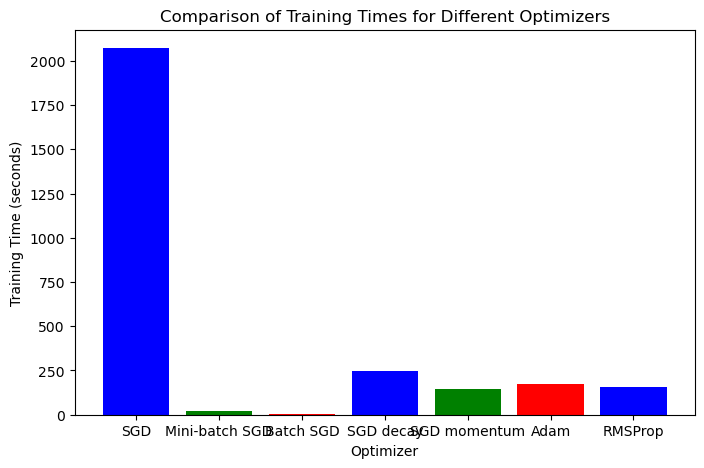

In [13]:
# Visualizing Training Time
plt.figure(figsize=(8, 5))
plt.bar(training_times.keys(), training_times.values(), color=['blue', 'green', 'red'])
plt.xlabel("Optimizer")
plt.ylabel("Training Time (seconds)")
plt.title("Comparison of Training Times for Different Optimizers")
plt.show()